#  Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!


# The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


# Predict : Type of glass

In [1]:
# import basic library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',
               names=['Id number','refractive index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type of glass'])
df.head()

,Id number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 11)

#  There are 214 rows and 11 columns present in dataset

In [4]:
df.isna().sum()

Id number           0
refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

#  There are no Null value present in dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id number         214 non-null    int64  
 1   refractive index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type of glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


#  All columns are float datatype except target variable is int datatype 
# There is multiclass classification model

In [6]:
for i in df.columns:
    print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        3
3        4
4        5
      ... 
209    210
210    211
211    212
212    213
213    214
Name: Id number, Length: 214, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: refractive index, Length: 214, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Sodium, Length: 214, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      4.49
1      3.60
2      3.55
3      3.69
4      3.62
       ... 
209    0.00
210    0.00
211    0.00
212    0.00
213    0.00
Name: Magnesium, Length: 214, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      1.10
1      1.36
2      1.

#  ID number column is just a serial number and this is not contribute to dataset so better we drop this column

In [ ]:
df.drop(columns='Id number',inplace=True)

In [11]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
df.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# The given statistical information of the numerical column
The summary of the dataset looks almost perfect since there is no negative value present in  dataset
from the above desccription we observed the following :
the counts of the all columns are same which means there is no missing value in the dataset
there is all float datatype except target variable
the mean value and 50 percetile value is almost near

#  write statistics info

#  EDA

#  Univariate analysis

6     9
5    13
3    17
7    29
1    70
2    76
Name: Type of glass, dtype: int64


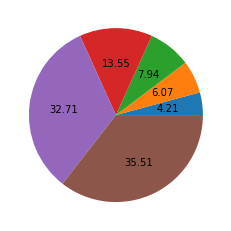

In [13]:
count_Type_of_glass=(df['Type of glass'].value_counts().sort_values())
print(count_Type_of_glass)

plt.pie(x=count_Type_of_glass,autopct='%.2f',pctdistance=0.6, labeldistance=2)
plt.show()

# 
this  dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7) 

then let's divided in two results window glass and non-window glass.

and convert to multiclassification promble to binary classification promblem



In [14]:
df['Type of glass'] = df['Type of glass'].replace({1: 'Window', 2: 'Window', 3: 'Window', 4: 'Window', 5: 'Non-Window', 6: 'Non-Window', 7: 'Non-Window'})

Non-Window     51
Window        163
Name: Type of glass, dtype: int64


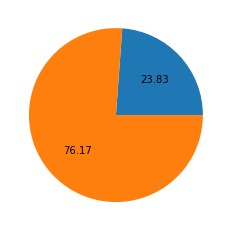

In [15]:
count_Type_of_glass=(df['Type of glass'].value_counts().sort_values())
print(count_Type_of_glass)

plt.pie(x=count_Type_of_glass,autopct='%.2f',pctdistance=0.6, labeldistance=2)
plt.show()

#  There is data imbalanced but we will solve this promble after build a model

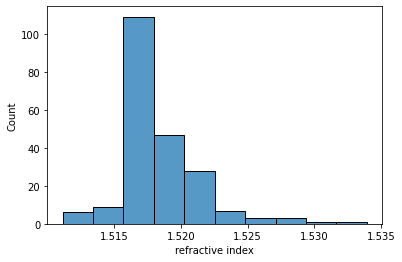

In [16]:
sns.histplot(data=df['refractive index'],bins=10)
plt.show()

# There is a range of  refractive index distrubuted in the dataset

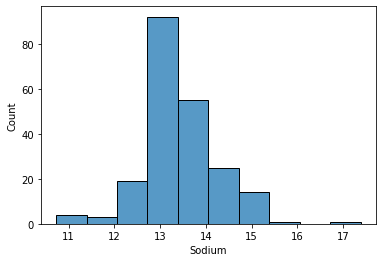

In [17]:
sns.histplot(data=df['Sodium'],bins=10)
plt.show()

# There is a range of  Sodium distrubuted in the dataset

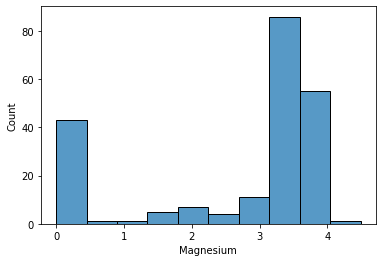

In [18]:
sns.histplot(data=df['Magnesium'],bins=10)
plt.show()

# There is a range of  Magnesium distrubuted in the dataset

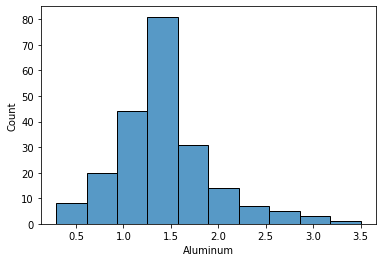

In [19]:
sns.histplot(data=df['Aluminum'],bins=10)
plt.show()

# There is a range of  Aluminum distrubuted in the dataset

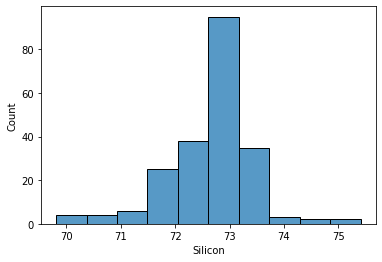

In [20]:
sns.histplot(data=df['Silicon'],bins=10)
plt.show()

# There is a range of  Silicon distrubuted in the dataset

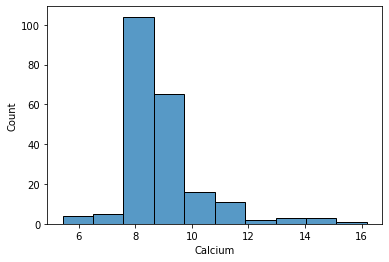

In [21]:
sns.histplot(data=df['Calcium'],bins=10)
plt.show()

# There is a range of  Calcium distrubuted in the dataset

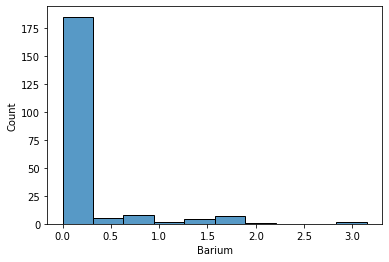

In [22]:
sns.histplot(data=df['Barium'],bins=10)
plt.show()

# There is a range of  Barium distrubuted in the dataset

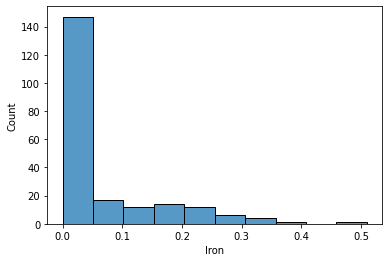

In [23]:
sns.histplot(data=df['Iron'],bins=10)
plt.show()

# There is a range of  Iron distrubuted in the dataset

<AxesSubplot:>

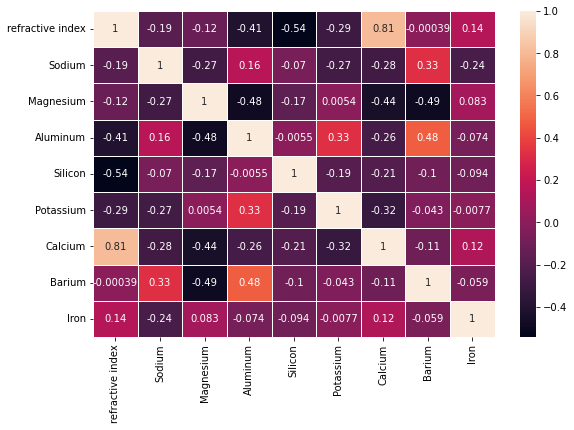

In [24]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(),annot=True,fmt='.2g',linewidths=1,ax=ax)

#  As i observed there are refractive index and Calcium has strong corelation 
but we need more proof

<AxesSubplot:xlabel='refractive index', ylabel='Calcium'>

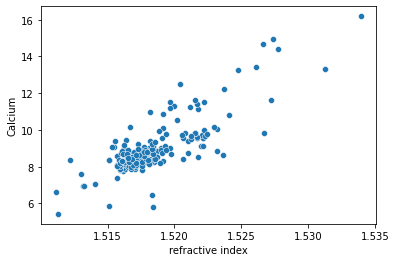

In [25]:
sns.scatterplot(x='refractive index',y='Calcium',data=df)

#  As we see Calcium and refractive index has strong corelation so we drop one column 
# and we drop refractive index cause there is minus co-relation of target variables

In [26]:
df.drop(columns='refractive index',inplace=True)

In [27]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

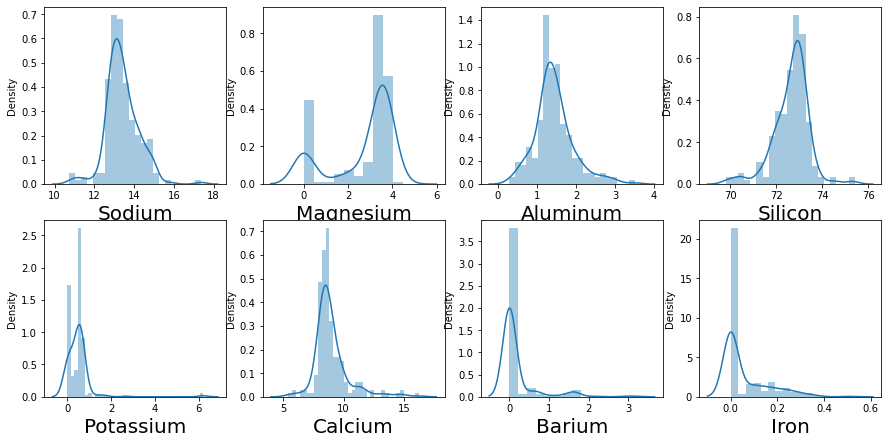

In [28]:
 plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

# 
As we observed Sodium and Aluminum, is closed to normaly distrubuted

Magnesium and Silicon is left skew

 Potassium,Calcium, Barium and Iron is right skew

#  outliers checking

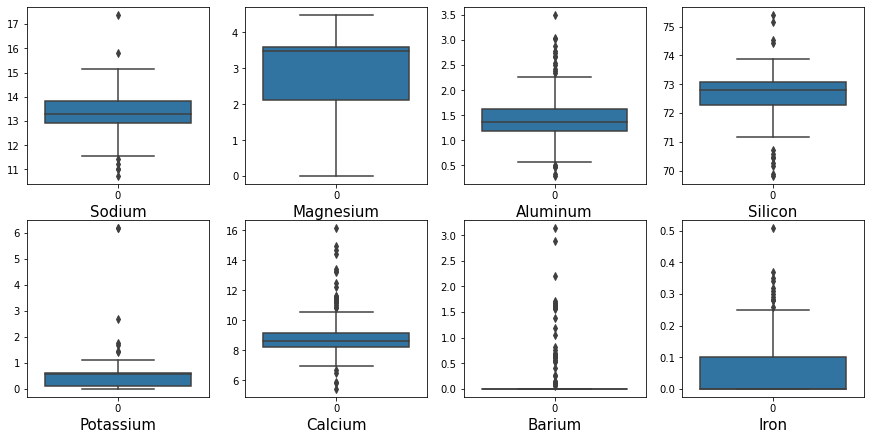

In [29]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


#  
From the above outcome we can see that Magnesium has no outliers
sodium ,potassium has very less outliers




In [30]:
df.skew()

Sodium       0.454181
Magnesium   -1.152559
Aluminum     0.907290
Silicon     -0.730447
Potassium    6.551648
Calcium      2.047054
Barium       3.416425
Iron         1.754327
dtype: float64

#  potassium has very high skewness so we drop this column

In [ ]:
df=df.drop(columns='Potassium',axis=1)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lm=LabelEncoder()
df['Type of glass']=lm.fit_transform(df['Type of glass'])

In [41]:
df['Type of glass'].value_counts()

1    163
0     51
Name: Type of glass, dtype: int64

In [42]:
x=df.drop(columns='Type of glass')
y=df['Type of glass']

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(214, 7)

In [44]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 107, 107, 110, 111, 112, 131, 145, 162,
       163, 163, 163, 171, 172, 174, 184, 184, 188, 189, 201, 203, 207,
       213], dtype=int64), array([4, 0, 3, 4, 5, 3, 4, 4, 4, 4, 4, 6, 6, 2, 3, 5, 2, 2, 6, 0, 3, 3,
       5, 3, 5, 5, 5], dtype=int64))


In [45]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(214, 8)
(194, 8)


In [46]:
y[(z<3).all(axis=1)]
print(y.shape)

(214,)


#  percentage of data loss:

In [47]:
loss_percent = (214-194)/214*100
loss_percent

9.345794392523365

In [48]:
from sklearn.preprocessing import power_transform

#  we use yeo-johnson techniques

In [49]:
# yeo-johnson by default method
x= (power_transform(x))
x

array([[ 0.3170608 ,  1.87627311, -0.66262997, ..., -0.01065411,
        -0.45488952, -0.68001492],
       [ 0.6165768 ,  0.66816318, -0.07749848, ..., -0.88453191,
        -0.45488952, -0.68001492],
       [ 0.18334446,  0.60804604,  0.2910754 , ..., -0.93825077,
        -0.45488952, -0.68001492],
       ...,
       [ 1.16383548, -1.73928948,  1.15937696, ..., -0.28273303,
         2.37684792, -0.68001492],
       [ 1.18668078, -1.73928948,  1.02466947, ..., -0.24644583,
         2.37663774, -0.68001492],
       [ 1.01447527, -1.73928948,  1.25809334, ..., -0.12223616,
         2.3769231 , -0.68001492]])

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=(scaler.fit_transform(x))
x

array([[ 0.3170608 ,  1.87627311, -0.66262997, ..., -0.01065411,
        -0.45488952, -0.68001492],
       [ 0.6165768 ,  0.66816318, -0.07749848, ..., -0.88453191,
        -0.45488952, -0.68001492],
       [ 0.18334446,  0.60804604,  0.2910754 , ..., -0.93825077,
        -0.45488952, -0.68001492],
       ...,
       [ 1.16383548, -1.73928948,  1.15937696, ..., -0.28273303,
         2.37684792, -0.68001492],
       [ 1.18668078, -1.73928948,  1.02466947, ..., -0.24644583,
         2.37663774, -0.68001492],
       [ 1.01447527, -1.73928948,  1.25809334, ..., -0.12223616,
         2.3769231 , -0.68001492]])

In [51]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [52]:
y.value_counts()

1    163
0    163
Name: Type of glass, dtype: int64

In [53]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 1.0 at random_state 94


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [56]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [57]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.9897959183673469


[[43  0]
 [ 1 54]]


In [58]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.9897959183673469


[[42  1]
 [ 0 55]]


In [59]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.9795918367346939


[[43  0]
 [ 2 53]]


In [60]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.9897959183673469


[[43  0]
 [ 1 54]]


In [61]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.9897959183673469


[[42  1]
 [ 0 55]]


In [62]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.9795918367346939


[[43  0]
 [ 2 53]]


In [63]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.9591836734693877


[[42  1]
 [ 3 52]]


#  Cross Validation Score

In [64]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.92424242 0.96923077 0.95384615 0.83076923 1.        ]
0.9356177156177157
Difference between Accuracy score  and cross validation score is -  0.054178202749631255


In [65]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.92424242 1.         0.96923077 0.81538462 1.        ]
0.9417715617715618
Difference between Accuracy score  and cross validation score is -  0.04802435659578508


In [66]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.92424242 1.         0.98461538 0.81538462 1.        ]
0.9448484848484849
Difference between Accuracy score  and cross validation score is -  0.04494743351886199


In [67]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.92424242 0.98461538 0.96923077 0.90769231 1.        ]
0.9571561771561772
Difference between Accuracy score  and cross validation score is -  0.03263974121116975


In [68]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.93939394 0.98461538 0.95384615 0.86153846 1.        ]
0.947878787878788
Difference between Accuracy score  and cross validation score is -  0.03171304885590587


In [69]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.89393939 0.95384615 0.96923077 0.87692308 1.        ]
0.9387878787878787
Difference between Accuracy score  and cross validation score is -  0.020395794681508983


In [70]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

Accuracy score 0.9795918367346939


[[43  0]
 [ 2 53]]
ExtraTreesClassifier 


[0.92424242 1.         0.96923077 0.8        1.        ]
0.9386946386946388
Difference between Accuracy score  and cross validation score is -  0.051101279672708166


#  The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7) and this result gives  best  ExtraTreesClassifier algorithm

# ExtraTreesClassifier gives  97 accuracy and gridsearchcv difference is 5 per

#  Let's try to improve more accuracy

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters ={'criterion': ['gini','entropy'],
            'random_state': [10,100,850],
            'max_depth':[0,15,30],
            'n_jobs': [-2,-1,1],
            'n_estimators':[50,100,200,300]}



In [73]:
gdsv= GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gdsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 100, 850]})

In [74]:
gdsv.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 850}

In [75]:
Final_model= ExtraTreesClassifier(criterion= 'gini',max_depth= 30,n_estimators = 200  , n_jobs= -2 ,random_state =850)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

97.95918367346938


#  There is no improvement to use hyperpyrameter tunning

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,y_pred))   # support means sample to x_test 

              precision    recall  f1-score   support

           0       0.42      0.51      0.46        43
           1       0.54      0.45      0.50        55

    accuracy                           0.48        98
   macro avg       0.48      0.48      0.48        98
weighted avg       0.49      0.48      0.48        98



In [78]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [79]:
print('threshold',threshold)
print('False possitive rate',fpr)
print('True possitive rate',tpr)

threshold [2 1 0]
False possitive rate [0.         0.48837209 1.        ]
True possitive rate [0.         0.45454545 1.        ]


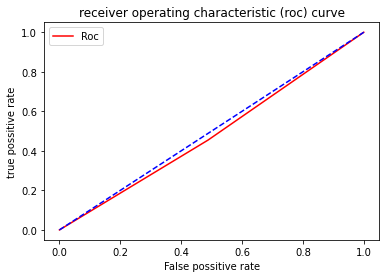

In [80]:
plt.plot(fpr,tpr, color='red', label='Roc')
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlabel('False possitive rate')
plt.ylabel('true possitive rate')
plt.title('receiver operating characteristic (roc) curve')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score


In [83]:
# how  much area auc curve covered
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.4830866807610994